In [91]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [92]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [93]:
NUM_CLASSES = 5

# 学習データ読み込み

In [94]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [95]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [97]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [98]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_16 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False
)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [100]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [101]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 29s 882ms/step - accuracy: 0.3125 - loss: 1.6099
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2925 - loss: 1.6137 - val_accuracy: 0.3042 - val_loss: 1.5209
Epoch 2/1000
27/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3207 - loss: 1.5164 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3224 - loss: 1.5134 - val_accuracy: 0.4187 - val_loss: 1.4430
Epoch 3/1000
31/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3417 - loss: 1.4548 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3425 - loss: 1.4532 - val_accuracy: 0.4549 - val_loss: 1.3702
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3763 - loss: 1.3998 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ke

In [102]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9249 - loss: 0.3534 


In [103]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [104]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[9.70850978e-03 1.50119150e-02 8.51595283e-01 3.04908622e-06
 1.23681225e-01]
2


# 混同行列

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step


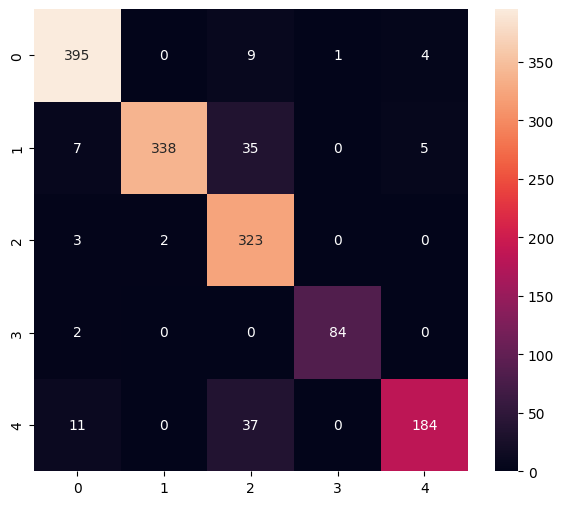

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       409
           1       0.99      0.88      0.93       385
           2       0.80      0.98      0.88       328
           3       0.99      0.98      0.98        86
           4       0.95      0.79      0.87       232

    accuracy                           0.92      1440
   macro avg       0.94      0.92      0.92      1440
weighted avg       0.93      0.92      0.92      1440



In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [106]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [107]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\rahul\AppData\Local\Temp\tmpj2ub8ul1\assets


INFO:tensorflow:Assets written to: C:\Users\rahul\AppData\Local\Temp\tmpj2ub8ul1\assets


Saved artifact at 'C:\Users\rahul\AppData\Local\Temp\tmpj2ub8ul1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_8')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2094582062864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2094582061712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2094582065744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2094582064976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2094582063248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2094582057872: TensorSpec(shape=(), dtype=tf.resource, name=None)


6616

# 推論テスト

In [108]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [109]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [110]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [111]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 998 μs


In [112]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.7085154e-03 1.5011917e-02 8.5159540e-01 3.0490864e-06 1.2368122e-01]
2
